<a href="https://colab.research.google.com/github/Alana-0/Implementa-o-de-Dijkstra/blob/main/Dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introdução

Neste trabalho, exploramos como os roteadores em redes de computadores são capazes de determinar o melhor caminho entre dois dispositivos, com base em algoritmos de roteamento. Para isso, utilizamos o algoritmo de Dijkstra, amplamente empregado para calcular o menor caminho entre dois nós em um grafo ponderado, sendo especialmente útil em protocolos como o OSPF (Open Shortest Path First).

O objetivo principal é compreender o funcionamento desse algoritmo e aplicá-lo à simulação de uma rede construída no Packet Tracer. A partir disso, será possível visualizar como o roteador define rotas otimizadas e como o caminho mais curto é calculado entre diferentes dispositivos.

Neste notebook, será apresentada:

* A implementação aprimorada do algoritmo de Dijkstra, incluindo a criação de um mapa de predecessores;
* Uma função que exibe o menor caminho entre dois vértices da rede em formato legível;
* A simulação gráfica da rede, baseada no cenário configurado no Packet Tracer;
* A execução do algoritmo para encontrar o menor caminho entre os pares de nós A-F, B-F e D-B;
* Uma discussão sobre o protocolo RIP, suas limitações e alternativas mais adequadas para redes complexas.

Com isso, reforçamos o entendimento dos algoritmos de roteamento e sua aplicação prática no gerenciamento de redes de computadores.

**negrito**### **1. Implementação do Algoritmo de Dijkstra**





In [ ]:
import heapq

def dijkstra(graph, start):
    # Inicialização das distâncias e predecessores
    shortest_distances = {node: float('inf') for node in graph}
    shortest_distances[start] = 0
    predecessors = {node: None for node in graph}

    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > shortest_distances[current_node]:
            continue

        for neighbor, weight in graph[current_node]:
            distance = current_distance + weight
            if distance < shortest_distances[neighbor]:
                shortest_distances[neighbor] = distance
                predecessors[neighbor] = current_node  # Atualiza o predecessor
                heapq.heappush(priority_queue, (distance, neighbor))

    return shortest_distances, predecessors


# Função para reconstruir o caminho
def menor_caminho(graph, origem, destino):
    distancias, predecessores = dijkstra(graph, origem)
    caminho = []
    atual = destino

    # Reconstrução do caminho a partir dos predecessores
    while atual is not None:
        caminho.insert(0, atual)
        atual = predecessores[atual]

    if caminho[0] != origem:
        return f"Não existe caminho de {origem} para {destino}"
    return " -> ".join(caminho)


# **2. Função de Definição do Menor Caminho**

In [ ]:
def menor_caminho(graph, origem, destino):
    distancias, predecessores = dijkstra(graph, origem)
    caminho = []
    atual = destino

    # Reconstrói o caminho de trás pra frente
    while atual is not None:
        caminho.insert(0, atual)
        atual = predecessores[atual]

    # Verifica se é possível alcançar o destino a partir da origem
    if caminho[0] != origem:
        return f"Não existe caminho de {origem} para {destino}"

    return " -> ".join(caminho)


**Como funciona a função menor_caminho**


-> Executa o algoritmo de Dijkstra para obter:

->As menores distâncias até cada vértice.

->O mapa de predecessores que guarda o caminho percorrido.

->Reconstrói o caminho do destino até a origem, usando os predecessores.

->Imprime o caminho no formato: A -> C -> E -> F


#  3. Simulação Gráfica da Rede

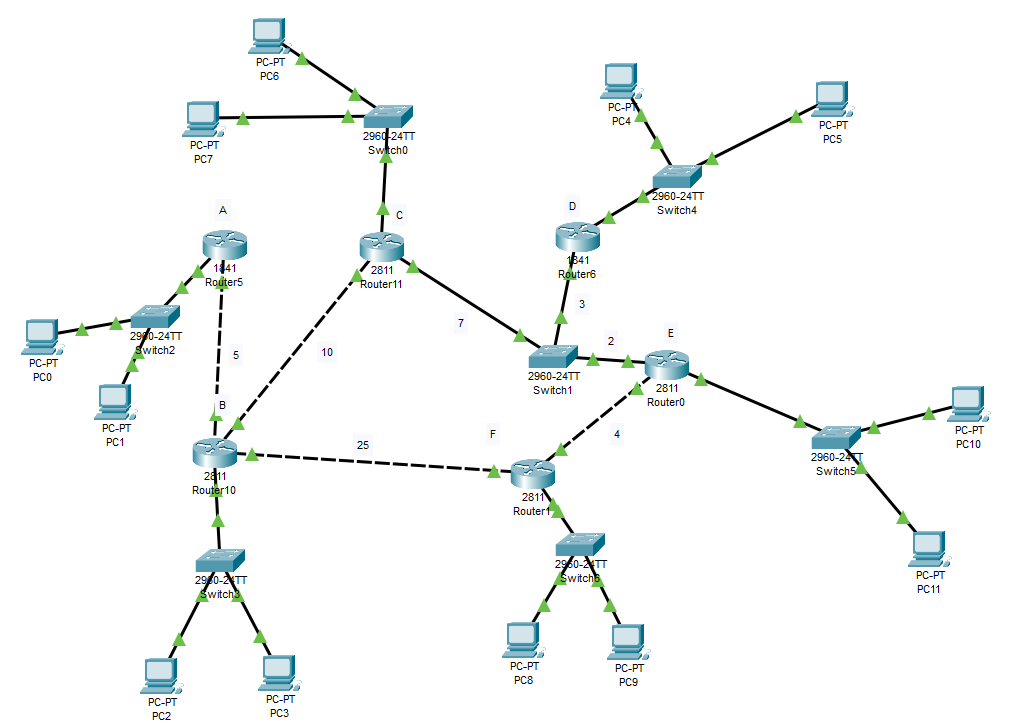

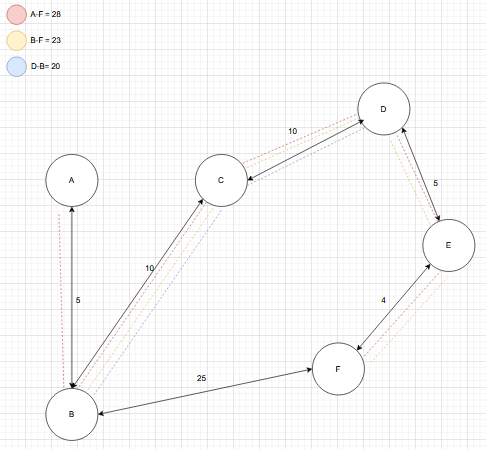

#  4. Execução do Algoritmo

In [ ]:
import heapq

# Algoritmo de Dijkstra com mapa de predecessores
def dijkstra(graph, start):
    shortest_distances = {node: float('inf') for node in graph}
    shortest_distances[start] = 0
    predecessors = {node: None for node in graph}

    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > shortest_distances[current_node]:
            continue

        for neighbor, weight in graph[current_node]:
            distance = current_distance + weight
            if distance < shortest_distances[neighbor]:
                shortest_distances[neighbor] = distance
                predecessors[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    return shortest_distances, predecessors

# Função que exibe o menor caminho
def menor_caminho(graph, origem, destino):
    distancias, predecessores = dijkstra(graph, origem)
    caminho = []
    atual = destino

    while atual is not None:
        caminho.insert(0, atual)
        atual = predecessores[atual]

    if caminho[0] != origem:
        return f"Não existe caminho de {origem} para {destino}"

    return " -> ".join(caminho)


# EXEMPLO DE USO:
grafo = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 5)],
    'C': [('A', 4), ('B', 2), ('D', 1)],
    'D': [('B', 5), ('C', 1), ('E', 3)],
    'E': [('D', 3), ('F', 1)],
    'F': [('E', 1)]
}

# Testes de saída
print("Caminho de A até F:", menor_caminho(grafo, 'A', 'F'))
print("Caminho de B até F:", menor_caminho(grafo, 'B', 'F'))
print("Caminho de D até B:", menor_caminho(grafo, 'D', 'B'))


Caminho de A até F: A -> B -> C -> D -> E -> F
Caminho de B até F: B -> C -> D -> E -> F
Caminho de D até B: D -> C -> B


# **5. Protocolo RIP**

O RIP (Routing Information Protocol) é um protocolo antigo de roteamento baseado em vetor de distância, que utiliza o número de saltos como critério para escolher rotas. Embora seja simples e fácil de configurar, apresenta várias limitações:

    Aceita no máximo 15 saltos, o que restringe redes maiores;

    Possui convergência lenta, o que pode gerar atrasos e falhas temporárias na rede;

    Não considera fatores como largura de banda ou latência;

    Envia atualizações periódicas mesmo sem mudanças, gerando tráfego desnecessário.

Por esses motivos, o RIP não é recomendado para redes complexas.

Entre as alternativas mais modernas e eficientes estão:

    OSPF: baseado no algoritmo de Dijkstra, é rápido, escalável e permite uso de métricas reais;

    EIGRP: híbrido e otimizado, oferece convergência rápida e melhor controle das rotas;

    IS-IS: altamente escalável, usado em redes de grande porte como operadoras.

Assim, para redes grandes e dinâmicas, protocolos como OSPF, EIGRP ou IS-IS são mais indicados que o RIP.